In [68]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data

In [69]:
data1=pd.read_csv("gina_agnostic.csv",delimiter=",")
data1.head()


,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,...,attr961,attr962,attr963,attr964,attr965,attr966,attr967,attr968,attr969,label
0,0,94,9,0,0,0,224,0,0,0,...,0,0,0,0,0,0,0,254,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,162,0,0,254,0,-1
2,0,0,0,0,87,0,0,0,180,0,...,253,0,0,0,198,0,0,0,101,1
3,0,0,70,0,0,0,0,0,253,0,...,0,253,0,3,253,0,0,0,0,-1
4,0,130,190,0,253,0,0,21,167,0,...,0,253,0,199,253,0,45,47,0,1


In [70]:
print (data1.shape)

(3468, 971)


# doing pca

In [71]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95, svd_solver="full")
pca.fit(data1)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

[0.05027614 0.04940707 0.03773493 0.03506099 0.0318792  0.03009925
 0.02773859 0.02724938 0.02522145 0.02462407 0.02235006 0.02124683
 0.01691517 0.01639331 0.01476677 0.01403265 0.01392318 0.01372967
 0.01202808 0.01171503 0.01114321 0.01042299 0.01023931 0.01015126
 0.00890612 0.00837429 0.00834667 0.00823192 0.00811441 0.00796706
 0.00753107 0.00749679 0.00696111 0.00678072 0.00657052 0.00632175
 0.00612472 0.00599801 0.00594711 0.00570257 0.00558955 0.00535546
 0.00521673 0.00505814 0.00480016 0.00468496 0.00461447 0.00459022
 0.00445503 0.00442543 0.00427276 0.00420095 0.00411872 0.0040284
 0.00396449 0.00392309 0.00375878 0.00368829 0.00353452 0.0034343
 0.00336983 0.00328933 0.00319595 0.00316635 0.00305412 0.00300561
 0.00295416 0.00286722 0.00279292 0.00273741 0.00271223 0.00264132
 0.00262917 0.00253175 0.00249716 0.0024588  0.0024273  0.00238778
 0.00236336 0.00231249 0.00230136 0.00219526 0.00217482 0.00213566
 0.00210843 0.00209147 0.00203749 0.0019705  0.00193613 0.001906

In [72]:
data_pca=pca.transform(data1)
print(data_pca)

[[-831.45633446    3.72218505  245.61508147 ...    7.3511097
    94.06230725   68.21223373]
 [-759.20224415 -181.39765201 -321.66206461 ...  -12.82691903
   -11.05246969  -33.91437977]
 [ 383.07823946 -280.86168605  133.77947285 ...   33.35487861
   -56.73531592  -10.3900868 ]
 ...
 [ 154.05332247 -890.68919853 -873.68268264 ...   32.34132352
   -43.88914941   -7.61782404]
 [ 459.81984131  -68.51462511   -8.104787   ...  -45.89849241
    54.55752574  -20.33912157]
 [1182.08864601   33.13788489  412.16294454 ...  -41.38375228
   -69.77763553  -51.29777267]]


Text(0,0.5,'explained_variance_ratio_')

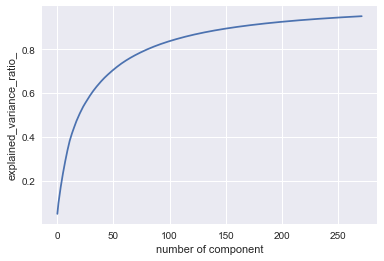

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of component")
plt.ylabel("explained_variance_ratio_")

(3468, 272)


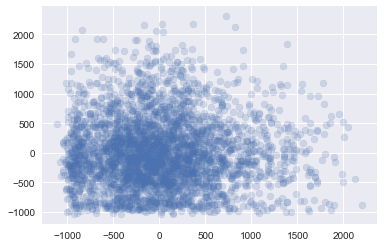

In [74]:
plt.scatter(data_pca[:,0],data_pca[:,1],alpha=0.2)
print(data_pca.shape)

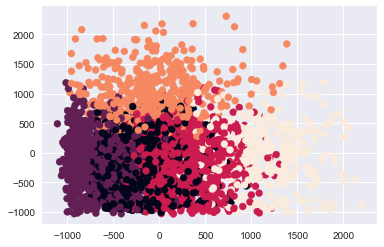

In [75]:
from sklearn.cluster import KMeans
x_pred = KMeans(n_clusters=5, random_state=9).fit_predict(data_pca)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=x_pred)
plt.show()

In [76]:
from sklearn import metrics
metrics.calinski_harabaz_score(data_pca, x_pred) 

97.82882156486241

In [82]:
print(x_pred.shape)
print(x_pred)

(3468,)
[1 1 2 ... 0 2 4]


In [83]:
dict={}

In [84]:
cluster_0=np.full_like(x_pred,0)
cluster_1=np.full_like(x_pred,1)
cluster_2=np.full_like(x_pred,2)
cluster_3=np.full_like(x_pred,3)
cluster_4=np.full_like(x_pred,4)

In [91]:
dict['0']=np.where(x_pred==0)[0].tolist()
dict['1']=np.where(x_pred==1)[0].tolist()
dict['2']=np.where(x_pred==2)[0].tolist()
dict['3']=np.where(x_pred==3)[0].tolist()
dict['4']=np.where(x_pred==4)[0].tolist()
import json
with open('data.json', 'w') as fp:
    json.dump(dict, fp)